<a href="https://colab.research.google.com/github/kaajalguptaa/Earthquake/blob/main/Heart_Diesease_Prediction_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTING HEART DISEASE**


Heart disease is the number one cause of death worldwide, so if you're looking to use data science for good you've come to the right place. To learn how to prevent heart disease we must first learn to reliably detect it.
Our dataset is from a study of heart disease that has been open to the public for many years. The study collects various measurements on patient health and cardiovascular statistics, and of course makes patient identities anonymous.

 
**OVERVIEW :**

* Preventing heart disease is important. Good data-driven systems for predicting heart disease can improve the entire research and prevention process, making sure that more people can live healthy lives.

* In the United States, the Centers for Disease Control and Prevention is a good resource for information about heart disease.

* 	About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths, according to their website.

* Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men.

* Coronary heart disease (CHD) is the most common type of heart disease, killing over 370,000 people annually.

* Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.

* Heart disease is the leading cause of death for people of most ethnicities in the United States, including African Americans, Hispanics, and whites. 

* For American Indians or Alaska Natives and Asians or Pacific Islanders, heart disease is second only to cancer.

**PROBLEM DESCRIPTION**
 
To predict the heart_disease_present(binary class), which represents whether patient has heart disease or not.

**FEATURES**
* **heart_disease_present** - patient with heart disease
 * Type - Binary
   * 0 - no heart disease present
   * 1 - heart disease present

There are 14 columns in the dataset, 

* **patient_id column** - unique and random identifier

The remaining 13 features are described in the section below,

*	**slope_of_peak_exercise_st_segment** - slope of quality of blood flow to the heart
 * Type - Integer
         * 1 - flat
         * 2 - upslope
         * 3 - downslope

* **thal** - Thallium stress test measuring blood flow to the heart
 * Type - categorical
   * normal
   * fixed_effect
   * reversible_effect

*	**resting_blood_pressure** - resting blood pressure
 * Type - Integer

* **chest_pain_type** - chest pain type (4 values)
 * Type - Interger
     * 1
     * 2
     * 3
     * 4


* **num_major_vessels** - number of major vessels (0-3) colored by flourosopy
 * Type - Interger
   * 0 - Arota 
   * 1 - vena cava
   * 2 - pulmonary artery 
   * 3 - pulmonary vien 

* **fasting_blood_sugar_gt_120_mg_per_dl** - fasting blood sugar > 120 mg/dl
 * Type - Binary
   * 0 - blood sugar range that will not affect heart (< 120 mg/dl)
   * 1 - blood sugar range that will affect heart (> 120 mg/dl)

* **resting_ekg_results** - resting electrocardiographic results
  * Type - Integer
    * 0 - normal
    * 1 - has ST-T (preclinical cardiac involement)
    * 2 - hypertrophy (maximum heart rate) 

* **serum_cholesterol_mg_per_dl** - serum cholestoral in mg/dl
  * Type - Integer


* **oldpeak_eq_st_depression** - oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
 * Type - Float

* **sex** 
 * Type - binary
   * 0 - female
   * 1 - male

* **age** - Age in years
 
  * Type - Integer

* **max_heart_rate_achieved** -  maximum heart rate achieved 
 * Type - Integer (Beats per minute)

* **exercise_induced_angina** - pain in the chest that comes on with exercise, stress, or other things that make the heart work harder. 
 *  Type- Binary
       
       * 0 - No chest pain

       * 1 - chest pain
 

**PREPARING THE TOOLS**

In [ ]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats 

# plots to appear inside the notebook 
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import  XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve
#import sweetviz as sv

# To ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
X = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1016-HeartDieseasePred/Data/values.csv")
Y = pd.read_csv("https://raw.githubusercontent.com/21Ovi/DataScience-DataSets/main/PRCP-1016-HeartDieseasePred/Data/labels.csv")

In [ ]:
X.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [ ]:
Y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [ ]:
X.head().T

,0,1,2,3,4
patient_id,0z64un,ryoo3j,yt1s1x,l2xjde,oyt4ek
slope_of_peak_exercise_st_segment,1,2,1,1,3
thal,normal,normal,normal,reversible_defect,reversible_defect
resting_blood_pressure,128,110,125,152,178
chest_pain_type,2,3,4,4,1
num_major_vessels,0,0,3,0,0
fasting_blood_sugar_gt_120_mg_per_dl,0,0,0,0,0
resting_ekg_results,2,0,2,0,2
serum_cholesterol_mg_per_dl,308,214,304,223,270
oldpeak_eq_st_depression,0.0,1.6,0.0,0.0,4.2


In [ ]:
Y.head().T

,0,1,2,3,4
patient_id,0z64un,ryoo3j,yt1s1x,l2xjde,oyt4ek
heart_disease_present,0,0,1,1,0


# **BASIC CHECKS**

**SHAPE**:
 
  To understand number of columns and rows from the dataset

In [ ]:
X.shape

(180, 14)

In [ ]:
Y.shape

(180, 2)


* No of rows  in the given X dataset is **180**
* No of columns in the given X dataset is **14**
* No of rows in the given Y dataset is **180** 
* No of columns in the given Y dataset is **2**

Lets merge X (values) and Y (labels) datasets, which is independent and dependent variables

In [ ]:
df=pd.merge(X,Y)
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


**Basic Information** about given Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

From the above **data info** ,

 * Data has object, integer, float values
 * Variable column has no null or missing values
 * `patient_id` and `thal` has object type data
 * Only `oldpeak_eq_st_depression` has Float data type
  


**DESCRIBE :**

It returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.



In [ ]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


Statistical Information on **Categorical Dataset**

In [ ]:
df.describe(include='O') 

,patient_id,thal
count,180,180
unique,180,3
top,0z64un,normal
freq,1,98


In [ ]:
for label, content in df.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

patient_id
thal


Total no of Numerical data is **13**

Total no of Categorical data is **2**

# **EXPLORATORY DATA ANALYSIS** 


 
For initial investigation on data
 
* To discover patterns 
* To plot anomalis

* To check assumptions with statistics and graphical representations

                                     


Importing sweetviz to analyze dataset

In [ ]:
#pip install sweetviz

UNIVARIATE ANALYSIS :

  *  To check features using various statistical methods and visualizations
   
   *  Missing values
   * Outliers
   * Normal distribution - skewness and kurtosis

In [ ]:
'''heart_disease_report = sv.analyze(df) #display the report
heart_disease_report.show_html('Heart_Disease.html')'''

"heart_disease_report = sv.analyze(df) #display the report\nheart_disease_report.show_html('Heart_Disease.html')"

**INSIGHTS FROM ABOVE UNIVARIATE ANALYSIS :**
     
*   slope_of_peak_exercise_st_segment is **flat slope** , which is present in **93 patients(53%)**.

*   Only 7% of patient has **downslope(12 - patient)**
* 98 Patients have normal thal
* Patients with reversible deffect are 41% and fixed defect 4% 
* Resting blood pressure , most of the patients have **blood pressure** around **130** and is present in **26 patients**.
* 46% of patients have type 4 pain , only 7% of patient has type 1 pain
* **109 patients(59%)**  have aroata vessels as **major blood vessel** type
* Only 8% of patients have pulmonary blood vessel type which is less in number.
* **84%** of patient have (**0 Type**) - blood sugar range that will not affect heart (< 120 mg/dl)
* Only **29** patients have (**1- type**) blood sugar 
* patients with resting electrocardiographic results is **normal** for only 85 patients(**47%**).
* Only **one patient** has ST-T (preclinical cardiac involement), which is **type 1**.
*serum cholestrol level is high between 204 to 239.
* **Oldpeak depression** is high between **0.0 to 0.5**, has occured in **56 patients**.
*Only one patient has 6.0 peak 
* **68%** of patients have **pain** due to **exercise** and 52 patients have pain without doing exercise. 
* **Males** are **highly** affected than compared to females 
* Around **124 patients** with heart disease are **male** and **56 patients** are **females** with heart disease.
*Age between 45 to 65 are highly affected by heart disease 
*80  patients are with heart disease , while 100 patients are without heart disease. 






## BIVARIATE ANALYSIS

  *  To check features using various statistical methods and visualizations
   
   *  Missing values
   * Outliers
   * Normal distribution - skewness and kurtosis

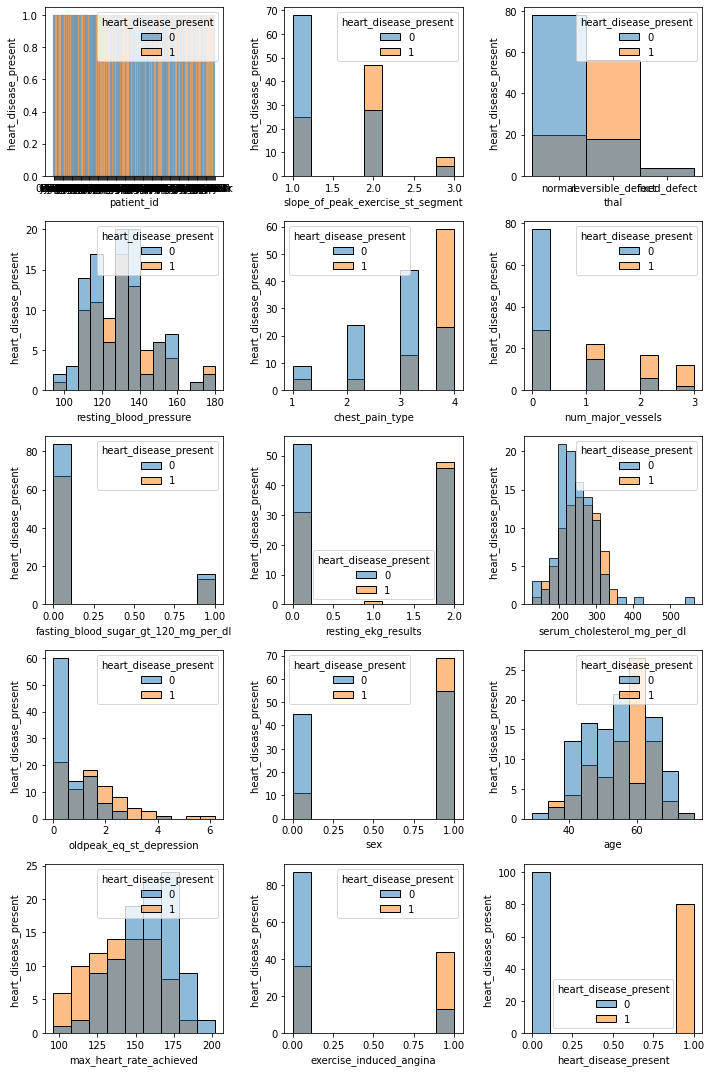

In [ ]:
plt.figure(figsize=(10,15), facecolor='white')# defining  canvas size
plotnumber = 1 # initializing plotnumber variable to 1 it will maintain the count of how many graph is going to plot in canvas 

for column in df: # iteration of columns / acessing the columns from  dataset 
    if plotnumber<=15 :     # as there are 13 columns in the data
        ax = plt.subplot(5,3,plotnumber)# plotting 40 graphs (4-rows,3-columns) ,plotnumber is for count  
        sns.histplot(x=df[column],hue=df.heart_disease_present) ## it give frequency hue =value counts
        plt.xlabel(column,fontsize=10) #assigning name to x-axis and "name" font size is 10
        plt.ylabel('heart_disease_present ',fontsize=10)#assigning name to y-axis and "name" font size is 10
    plotnumber+=1 # increment of plotnumber 
plt.tight_layout()#to show plot

**INSIGHTS FROM BIVARIATE ANALYSIS:**

  * **Maximum heart rate** around **100 to 140** , which leads to heart disease.

  * Pain due to **exercise range** around **0.90 to 1.00** has occured only in **40** patients.
  * **Ages** around **60** has high chances of getting heart disease.
  * **Males** are highly affected to **heart disease** than females.
  * **Peak range** of st depression more than **1** are affected by heart disease.
  * Patients with **serum cholestrol** around **350** has high heart related problem.
  *Blood sugar  range around **0 to 0.10** has high chances of getting heart disease
  *Patients with **Type 0 blood vessel** are more affected, **around 30**.
  * **slope of exercise** around **2.0** has **highly occured** in patients than other slope points.
  * **Chest pain** **type4** has occured **more** in heart patients.

*  Less number of unique values are analyzed are categorical features

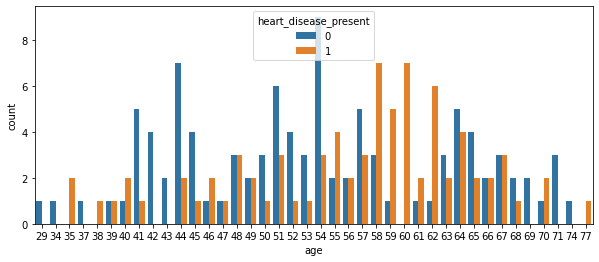

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='age',hue='heart_disease_present',data=df);

AGE :
  * Patients age between 58 to 62 has high chance of getting heart disease.
 

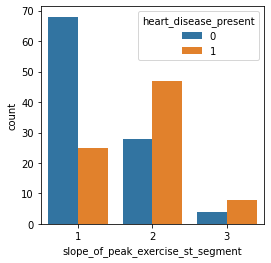

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='slope_of_peak_exercise_st_segment',hue='heart_disease_present',data=df);

SLOPE OF EXERCISE ST:

 * Type 1 -slope(flat),present in only 25% of patients. 
 * Type 2 slope(upslope) is high as compared to Type 3.   
 

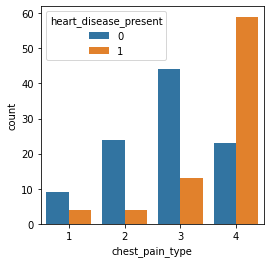

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='chest_pain_type',hue='heart_disease_present',data=df);

CHEST PAIN:
   * Type 4 chest pain is more in heart disease patient

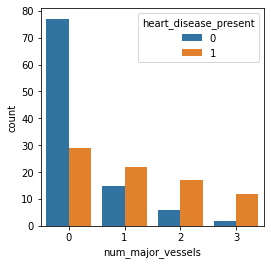

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='num_major_vessels',hue='heart_disease_present',data=df);

MAJOR VESSELS:
 
 * **0** - Arota vessels are seen in **many** heart disease people.
 * 1 - vena cava and  2 - pulmonary artery are present in less number of patients as compared to patients with arota vessels.
 * **3** - pulmonary vien is seen **less** heart patients.

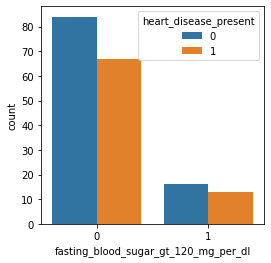

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='fasting_blood_sugar_gt_120_mg_per_dl',hue='heart_disease_present',data=df);

FASTING BLOOD SUGAR:


* 0 - blood sugar range that will not affect heart (< 120 mg/dl), has occured more in patients
* **1** - blood sugar range that **will affect heart** (> 120 mg/dl), seen only in **few patients**.


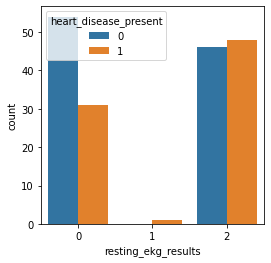

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='resting_ekg_results',hue='heart_disease_present',data=df);

RESTING EKA:
 
 * 0 - normal , it is noticed in average number of heart patients
 * 1 - has ST-T (preclinical cardiac involement) level is seen only in few   patients .

 * **2 - hypertrophy** (maximum heart rate) level  is present in **many pantients.**

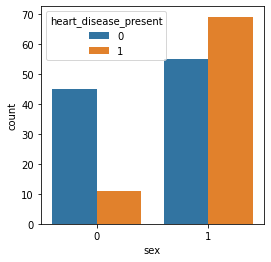

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='sex',hue='heart_disease_present',data=df);

SEX:

  * **Males(1)** have **high** chance of getting heart disease compared to womens.  

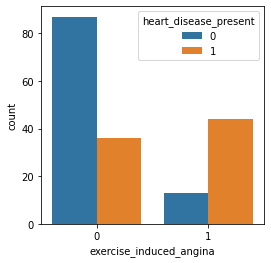

In [ ]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='exercise_induced_angina',hue='heart_disease_present',data=df);

EXERCISE INDUCED ANGINA:
   * Patients with **chest pain(1)** has **high risk** of getting heart disease than patiemts without chest pain(0). 

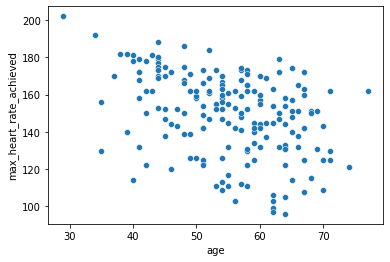

In [ ]:
sns.scatterplot(x='age',y='max_heart_rate_achieved',data=df);

AGE:
  
   * Patients age between 40 to 70 has high chances of achieving maximum heart rate.

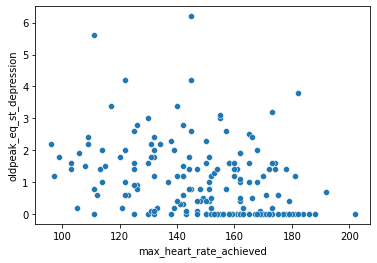

In [ ]:
sns.scatterplot(x='max_heart_rate_achieved',y='oldpeak_eq_st_depression',data=df);

OLDPEAK ST DEPRESSION:
 
 *  St depression range from **0 to 1.5**, occured in many patients which leads to **maximum heart rate(140 - 190)** , which is seen in **many heart patients**

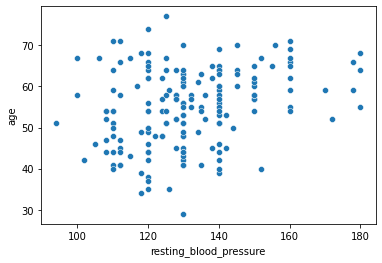

In [ ]:
sns.scatterplot(x='resting_blood_pressure',y='age',data=df);

RESTING BLOOD PRESSURE WITH AGE:
 
 * Blood pressure range **around 110 to 160** is highly seen in patients age **more than 40** 

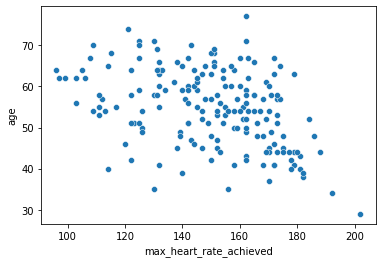

In [ ]:
sns.scatterplot(x='max_heart_rate_achieved',y='age',data=df);

AGE:
 
  *  Patients age from **40 till 70** has **high** chance to acheive maximum heart rate.

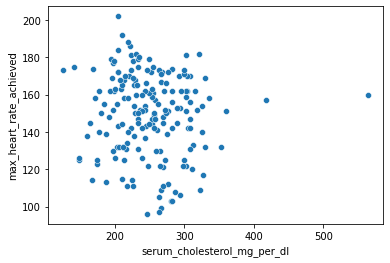

In [ ]:
sns.scatterplot(x='serum_cholesterol_mg_per_dl',y='max_heart_rate_achieved',data=df);

SERUM CHOLESTROL:
 
  * Patients with serum cholestrol range from **200 to 380** are **highly** occured ,which leads to maximum heart rate.  

# DataPreprocessing

In [ ]:
df.duplicated().sum()

0

No **Duplicate Values**

In [ ]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

**No NULL** Values

## Convert Categorical to numerial

In [ ]:
one_hot_encoded_df = pd.get_dummies(df['thal'])
one_hot_encoded_df 

,fixed_defect,normal,reversible_defect
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
175,0,0,1
176,0,1,0
177,0,0,1
178,0,1,0


In [ ]:
one_hot_encoded_df.rename({'fixed_defect': 'thal_fixed_defect', 'reversible_defect': 'thal_reversible_defect','normal':'thal_normal'}, axis=1, inplace=True)

In [ ]:
df.drop('thal',axis=1,inplace=True)

In [ ]:
df=df.join(one_hot_encoded_df)


In [ ]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_fixed_defect,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,0,1,0
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,0,1,0
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,0,1,0
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,0,0,1
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,0,0,1


Changed **thal datatype from categorical to numerical**

## Drop unwanted column

In [ ]:
df.drop('patient_id',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   resting_blood_pressure                180 non-null    int64  
 2   chest_pain_type                       180 non-null    int64  
 3   num_major_vessels                     180 non-null    int64  
 4   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 5   resting_ekg_results                   180 non-null    int64  
 6   serum_cholesterol_mg_per_dl           180 non-null    int64  
 7   oldpeak_eq_st_depression              180 non-null    float64
 8   sex                                   180 non-null    int64  
 9   age                                   180 non-null    int64  
 10  max_heart_rate_achieved               180 non-null    int64  
 11  exercise_induced_an

# Modeling

## Splitting data into Training and Testing

In [ ]:
X=df[['serum_cholesterol_mg_per_dl','resting_blood_pressure','chest_pain_type',
      'num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl','resting_ekg_results',
      'serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','max_heart_rate_achieved','age',
      'exercise_induced_angina','thal_fixed_defect','thal_normal','thal_reversible_defect']] #independent variable
y=df.heart_disease_present   #target variable

**X** is **independent** variable

**y** is **dependent** variable

In [ ]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Spliting training and test data

In [ ]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(144, 15) (144,) (36, 15) (36,)


## Feature Selection

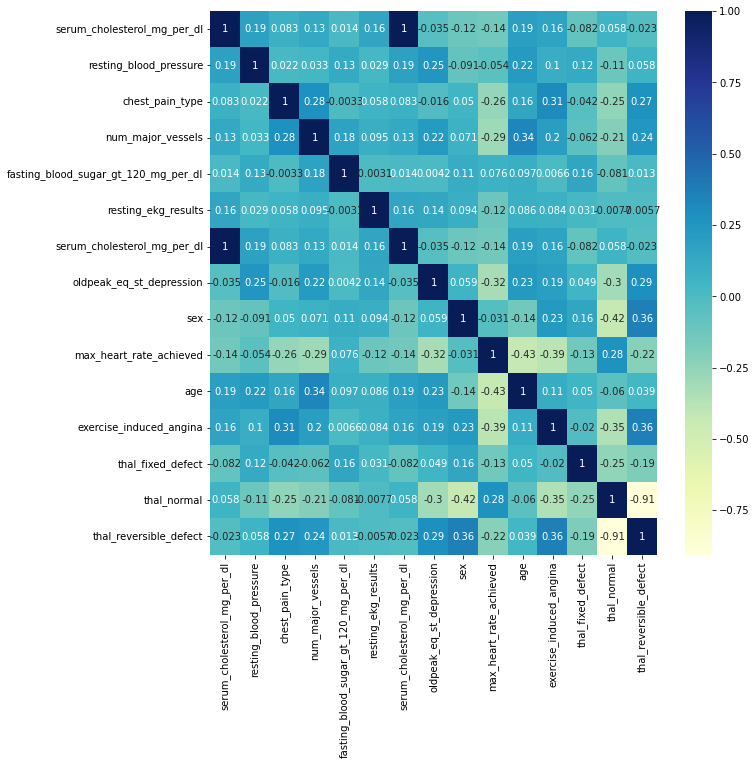

In [ ]:
plt.figure(figsize=(10,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Set the threashold to find **Highly correlation columns**

In [ ]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

**2 Columns** are highly correlated

In [ ]:
corr_features

{'serum_cholesterol_mg_per_dl', 'thal_reversible_defect'}

Correlated columns

## Dropping Highly correlated features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,oldpeak_eq_st_depression,sex,max_heart_rate_achieved,age,exercise_induced_angina,thal_fixed_defect,thal_normal
19,136,2,2,1,2,0.0,0,152,58,0,0,1
42,110,3,1,1,2,0.0,0,130,71,0,0,1
153,112,4,1,0,2,0.0,1,153,44,0,0,1
78,145,4,2,0,2,2.8,1,142,60,1,0,0
145,140,2,2,0,0,0.0,0,179,63,0,0,1
15,144,4,0,0,2,0.9,1,126,50,1,0,0
24,156,2,0,0,2,0.0,1,143,70,0,0,1
68,135,2,0,0,2,1.4,0,161,55,0,0,1
113,180,3,0,1,2,1.6,1,150,68,1,0,0
118,132,4,1,0,0,1.2,1,132,55,1,0,0


## Modeling

Now we've got our data splitted into training and testing sets, it's time to build a machine learning model.

We'll Train it (finding patterns) on the training set.

and then test it testing set

selecting a model from : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

after having a look I found some model to work with.

We're going to try 6 different Machine Learning Model:
1. `Logistic Regression`
2. `K-Nearest neighbours Classifer`
3. `RandomForestClassifer`
4. `SVC Classifier`
5. `XGBOOST Classifier`
6. `SGD Classifier`

In [ ]:
# Putting Models in a Dictionary to make our function more dynamic
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Xgboost":XGBClassifier(),
    "SGD":SGDClassifier()

}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
  """
  Fits and evaluate given machine learning models.
  Models: a dictionary of diccerent sklearn Machine Learnng Models
  X_train : Training data (no labeles)
  X_test : Testing data (no labels)
  y_train : Training labels
  y_test : Test labels
  """
  # Setting up Random seeds
  np.random.seed(42)
  # Make a dictionary to keep model scores
  model_scores ={}
  # Loop through models
  for name, model in models.items():
    # Fit the model to data
    model.fit(X_train.drop(corr_features,axis=1), y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test.drop(corr_features,axis=1),y_test)
  return model_scores

In [ ]:
%time
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train = y_train,
                             y_test = y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.06 µs


In [ ]:
model_scores

{'Logistic Regression': 0.8611111111111112,
 'KNN': 0.4722222222222222,
 'Random Forest': 0.8333333333333334,
 'SVC': 0.5833333333333334,
 'Xgboost': 0.8055555555555556,
 'SGD': 0.5}

Let's visulaize the model comparision before goin any further

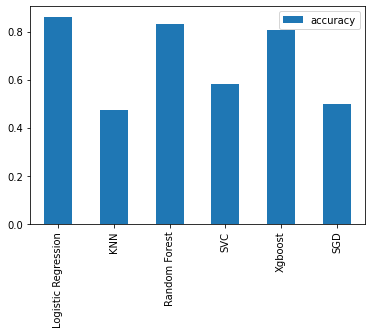

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

As we can see `LogisticRegressor`,`XGBoost Classification`, and`RandomForestClassifer`. performs best while `SVC Classification`, and `SGD Classification` and was slightly behind and `KNN`was perform worst.

but still, model's first predictions aren't always what we should based our next step off.

so let's do Hyperparameter Tuning

# Hyper Tuning

## Logistic Regression

In [ ]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LoisticRegression
rs_log_reg.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [ ]:
rs_log_reg.score(X_test.drop(corr_features,axis=1),y_test)

0.8611111111111112

After Tuning Logistic Regression, we got the best score as **0.86** as same as before tuning

## k Nearest Neighbor

In [ ]:
%time
# Let's Tune KNN

train_scores = []
test_scores = []

#create a list of different values of n_neighbours
neighbours = range(1,10)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neigbours
for i in neighbours:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_train.drop(corr_features,axis=1), y_train)

  # Update the training score list
  train_scores.append(knn.score(X_train.drop(corr_features,axis=1), y_train))

  # Update the test score list
  test_scores.append(knn.score(X_test.drop(corr_features,axis=1), y_test))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs


In [ ]:
train_scores

[1.0,
 0.7847222222222222,
 0.7638888888888888,
 0.7430555555555556,
 0.7638888888888888,
 0.7222222222222222,
 0.7569444444444444,
 0.7430555555555556,
 0.7291666666666666]

In [ ]:
test_scores

[0.6111111111111112,
 0.5833333333333334,
 0.5833333333333334,
 0.5555555555555556,
 0.4722222222222222,
 0.5277777777777778,
 0.5555555555555556,
 0.5833333333333334,
 0.5833333333333334]

Maximum KNN score on the test data: 0.6111111111111112


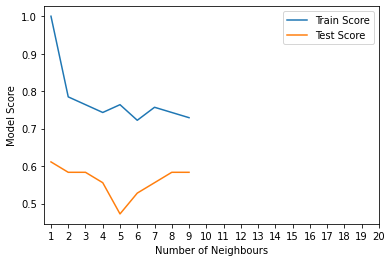

In [ ]:
plt.plot(neighbours, train_scores, label = "Train Score")
plt.plot(neighbours, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:",max(test_scores) )


After Tuning Logistic Regression, we got best score as **0.61** as higher than before tuning

## Stochastic Gradient Descent

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',  
'perceptron'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 

eta0 = [1, 10, 100] 

In [ ]:
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 

eta0=eta0) 

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
np.random.seed(42)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring='roc_auc', 
verbose=1, n_jobs=-1, 
n_iter=1000) 

In [ ]:
random_result = random.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [ ]:
random_result.best_params_

{'penalty': 'l2',
 'loss': 'modified_huber',
 'learning_rate': 'constant',
 'eta0': 10,
 'alpha': 0.001}

In [ ]:
np.random.seed(42)
sgd1=SGDClassifier(penalty='l2',
 loss = 'hinge',
 learning_rate = 'constant',
 eta0 = 1,
 alpha = 0.01)

In [ ]:
sgd1.fit(X_train.drop(corr_features,axis=1),y_train)

SGDClassifier(alpha=0.01, eta0=1, learning_rate='constant')

In [ ]:
sgd1.score(X_test.drop(corr_features,axis=1),y_test)

0.5555555555555556

After Tuned Stochastic Gradient Descent and got best score as **0.55** as **higher** than before tuning.

## Random Forest Classification

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False] 

    
params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap
     
}


In [ ]:
np.random.seed(42)
RC1=RandomForestClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(X_train.drop(corr_features,axis=1),y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
 

In [ ]:
RS.best_estimator_

RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=8, n_estimators=400)

In [ ]:
best_params=RS.best_params_ #best_params

In [ ]:
best_params

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [ ]:
np.random.seed(42)
model_RC=RandomForestClassifier(max_features='sqrt', min_samples_leaf=3,max_depth= 90,
                       min_samples_split=7, n_estimators=600,bootstrap= True) #fit with best_params
model_RC.fit(X_train.drop(corr_features,axis=1), y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_leaf=3,
                       min_samples_split=7, n_estimators=600)

In [ ]:
model_RC.score(X_test.drop(corr_features,axis=1),y_test)

0.8055555555555556

After Random Forest Classification Tuned and got best score as **0.80** as less than before tuning.

## Support Vector Classification

In [ ]:
#Hyper params
params={'C':[0.1,0.2,1,10,100,1000,10000,100000],
         'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

So now rather than doing hyperparamer tuning by hand or manully let's use `GridSearchCV`

In [ ]:
#GridSearchCV

svc_grid=GridSearchCV(SVC(random_state=42),params,scoring='f1',
    n_jobs=-1,
    refit=True,
    verbose=3,                  
    cv=3)
svc_grid.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=3)

In [ ]:
svc_grid.best_estimator_ 

SVC(C=10000, gamma=1e-05, random_state=42)

In [ ]:
best_params=svc_grid.best_params_ #best_params
best_params

{'C': 10000, 'gamma': 1e-05}

In [ ]:
svc_best_params=SVC(C=10000, gamma=1e-05, random_state=42,verbose=3)

In [ ]:
svc_best_params

SVC(C=10000, gamma=1e-05, random_state=42, verbose=3)

In [ ]:
svc_best_params.fit(X_train.drop(corr_features,axis=1), y_train)

[LibSVM]

SVC(C=10000, gamma=1e-05, random_state=42, verbose=3)

In [ ]:
svc_best_params.score(X_test.drop(corr_features,axis=1),y_test)

0.8333333333333334

Afte Tuning **SVC**,we  got **0.83** as higher than before tuning.

## XGBOOST Classification

In [ ]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [ ]:
np.random.seed(42)
XG=XGBClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [ ]:
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(X_train.drop(corr_features,axis=1), y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.0, 0.1001001001001001,
                                                  0.2002002002002002,
                                                  0.3003003003003003,
                                                  0.4004004004004004,
                                                  0.5005005005005005,
                                                  0.6006006006006006,
                                                  0.7007007007007008,
                                                  0.8008008008008008,
                                                  0.9009009009009009,
                                                  1.001001001001001,
                                                  1.1011011011011012,
                                                  1.2012012012012012,
                                                  1.3013013013013013...
         

In [ ]:
Xg_RS.best_estimator_ #best_estimator

XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31)

In [ ]:
best_params_xg=Xg_RS.best_params_ #best_params
best_params_xg

{'n_estimators': 31,
 'max_depth': 7,
 'learning_rate': 0.300000012,
 'gamma': 0.2002002002002002}

In [ ]:
xg_boost=XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31, random_state=42)
xg_boost.fit(X_train.drop(corr_features,axis=1), y_train) #fit

XGBClassifier(gamma=0.2002002002002002, learning_rate=0.300000012, max_depth=7,
              n_estimators=31, random_state=42)

In [ ]:
xg_boost.score(X_test.drop(corr_features,axis=1),y_test)

0.8333333333333334

After Tuned XGBPOOOST Classifier and got best score as **0.83** as higher than before tunning

**RESULT:**

   * We can see that ML model Logistic Regression gives a good accuracy of 86%, compared to other models. 



**THANK YOU**